<b><center>Homework 2  
Due 11:59pm EST Wednesday Sept 28<center></b>

In [197]:
import numpy as np
import pandas
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import itertools
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from pandas.tools.plotting import scatter_matrix
%matplotlib inline
from sklearn.linear_model import LinearRegression 
import math
# 3-D Surface plot
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

<b>Problem 1 [20 points].  Deflategate</b>

In a controversy that has divided the American football world, the local New England Patriots team's footballs were measured at the 12.5 psi range of the allowed 12.5 to 13.6 legal range before the game.  Ball measurements by two officials at halftime of the AFC Championship game in 2015 (http://www.businessinsider.com/psi-new-england-patriots-deflategate-footballs-2015-5) were:
11.50, 10.85, 11.15, 10.70, 11.10, 11.60, 11.85, 11.10, 10.95, 10.50,and 10.90 psi by one official, and
11.80, 11.20, 11.50, 11.00, 11.45, 11.96, 12.30, 11.55, 11.35, 10.90, and 11.35 psi by the other official.

You can assume the data is normally distributed for this problem and alpha = 0.05.


<b>Problem 1A</b>.  Are the balls measured by either official significantly lower than the allowed limit?


In [198]:
np.set_printoptions(precision=4)
psi=np.genfromtxt('Deflategate.csv',delimiter=',')
stats.ttest_1samp(psi[:,0],12.5)

Ttest_1sampResult(statistic=-11.464614896369884, pvalue=4.4821240155345132e-07)

In [199]:
stats.ttest_1samp(psi[:,1],12.5)

Ttest_1sampResult(statistic=-8.2009684274784735, pvalue=9.4687929567419705e-06)

As p is significantly low in both cases, the balls are significantly lower than the allowed limit

<b>Problem 1B</b>.  Are the two officials’ measurements statistically equivalent?  Assume that the two officials measured two sets of balls without any relationship between individual balls and use a t-test.

In [200]:
stats.ttest_ind(psi[:,0],psi[:,1])

Ttest_indResult(statistic=-2.1783351347354762, pvalue=0.041518182844559104)

I used the t test for two independent samples and the null hypothesis is that the means are equal. Based on the p value we will reject the null and state that there is a difference

<b>Problem 1C</b>.  Although we did not discuss this in lecture, when two sets of measurements are made on the same or similar enities, a paired t-test is often used.  These are frequently used for before/after tests, twin studies, and inter-rater tests.  Compute a paired test between the two officials assuming the balls are in the same order.  A good reference for these tests is http://www.statstutor.ac.uk/resources/uploaded/paired-t-test.pdf.

In [201]:
stats.ttest_1samp(psi[:,0]-psi[:,1],0)

Ttest_1sampResult(statistic=-22.182683078731205, pvalue=7.7787318913829914e-10)

<b>Problem 1D.</b>  When comparing two different tests, statisticians tend to compare them by determining which is more powerful.  Which one (paired or unpaired) is moe powerful (i.e. can establish significance with fewer samples)?  

A paired design reduces the randomness b/w measurements as the subject  is the same. And because the two-sample design, thefore can have a lot of variability, a larger N would b required to show significance

<b>Problem 1E.</b>  A study reported in https://www.sciencenews.org/blog/culture-beaker/deflategate-favored-foul-play-over-science suggests that the difference in temperature alone (ignoring the 250 pound super-athletes jumping on the balls) resulted in an average of 1.07 psi decrease.  Compare the average psi for each official’s measurements against the modified threshold (12.5-1.07).  What can you conclude?

In [202]:
stats.ttest_1samp(psi[:,0],12.5-1.07)

Ttest_1sampResult(statistic=-2.6451039597506947, pvalue=0.024518237815870203)

In [203]:
stats.ttest_1samp(psi[:,1],12.5-1.07)

Ttest_1sampResult(statistic=0.45601797533961219, pvalue=0.65811991332675901)

The null hypothesis is rejected for the first official but not rejected for the second one.

<b>Problem 1F.</b>  The previous study focused on dry balls that are not realistic given the field conditions.  Wetting the balls reduced the psi by an additional 0.75 psi.   Compare the average psi for each official’s measurements against the wet-modified threshold.  What can you conclude?


In [204]:
stats.ttest_1samp(psi[:,0],12.5-1.07-.75)

Ttest_1sampResult(statistic=3.5367962294683615, pvalue=0.0053854371234765969)

In [205]:
stats.ttest_1samp(psi[:,1],12.5-1.07-.75)

Ttest_1sampResult(statistic=6.523999098810231, pvalue=6.6890106344102203e-05)

Both measurements are now significant!

<b>Problem 2  [15 points]  Regression of one variable</b>

The frequently cited “Moore’s Law” originated with a 1965 article in Electronics magazine that said that the number of transistors in a given area would double every year.   

<b>Problem 2a</b> Using the mooresLawHw.txt file, compute the relationship between the number of transistors as a function of time.  Note that you may need to perform a transform of the data to more easily model the data.  Include the fit, diagnostics and your interpretation of these.

In [206]:
#regr = linear_model.LinearRegression()
#moores=np.genfromtxt('MooresLawHw.txt',delimiter='\t')
moore = pandas.read_csv('MooresLawHw.txt', sep='\t')
moore['LogTransistors']=np.log(moore['Transistors'])
#moore

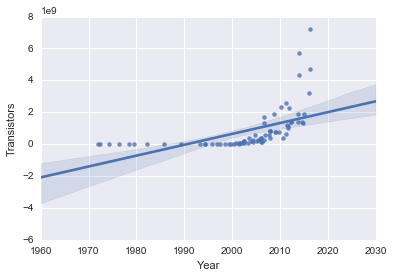

In [207]:
X=moore['Year']
Y=moore['Transistors']
logY=moore['LogTransistors']
scat1=sns.regplot(x="Year",y="Transistors",data=moore,scatter=True)
plt.xlabel("Year")
plt.ylabel("Transistors")
X = sm.add_constant(X)
model = sm.OLS.from_formula(formula='Transistors ~ Year' ,data=moore)
results=model.fit()

RSS :  9.41556039297243e+19
MSE :  1.2723730260773555e+18


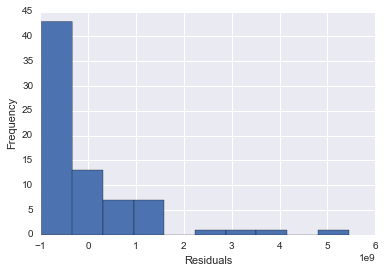

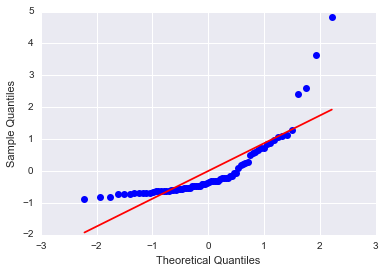

                            OLS Regression Results                            
Dep. Variable:            Transistors   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     30.17
Date:                Thu, 29 Sep 2016   Prob (F-statistic):           5.64e-07
Time:                        20:42:09   Log-Likelihood:                -1647.4
No. Observations:                  74   AIC:                             3299.
Df Residuals:                      72   BIC:                             3303.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1.357e+11   2.49e+10     -5.459      0.0

In [208]:
residuals = moore.Transistors - results.predict(X)
print("RSS : ", np.sum(results.resid**2))
print("MSE : ", np.mean(results.resid**2))  #Mean squared error
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.hist(results.resid)
plt.show()
fig = sm.qqplot(results.resid, fit=True, line='r')
plt.show()
print(results.summary())

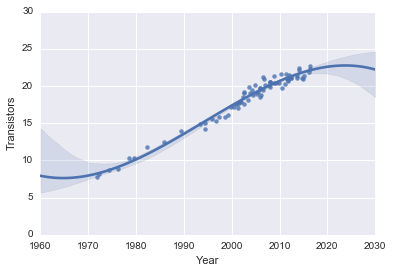

In [209]:
X=moore['Year']
X = sm.add_constant(X)
Y=moore['Transistors']
logY=moore['LogTransistors']
scat1=sns.regplot(x="Year",y="LogTransistors",data=moore,scatter=True,order=3)
plt.xlabel("Year")
plt.ylabel("Transistors")
model = sm.OLS.from_formula(formula='LogTransistors ~ Year+I(Year**3)' ,data=moore)
results=model.fit()

RSS :  30.694308959800768
MSE :  0.4147879589162266


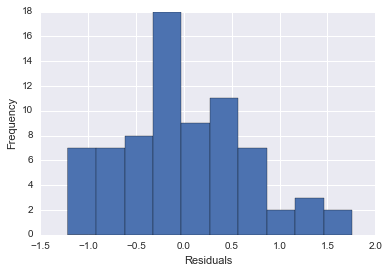

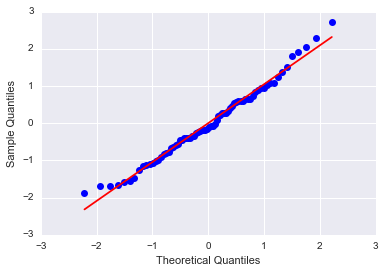

                            OLS Regression Results                            
Dep. Variable:         LogTransistors   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     1092.
Date:                Thu, 29 Sep 2016   Prob (F-statistic):           4.87e-54
Time:                        20:42:10   Log-Likelihood:                -72.442
No. Observations:                  74   AIC:                             150.9
Df Residuals:                      71   BIC:                             157.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept    -2726.4174   1434.234     -1.901   

In [210]:
residuals = moore.Transistors - results.predict(X)
print("RSS : ", np.sum(results.resid**2))
print("MSE : ", np.mean(results.resid**2))  #Mean squared error
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.hist(results.resid)
plt.show()
fig = sm.qqplot(results.resid, fit=True, line='r')
plt.show()
print(results.summary())

Answer 2a: As shown above, the un-transformed variable has R^2 of 0.295 and the log-transformed varaible has R^2 of 0.968 and adjusted R^2 of 0.967. The log data is an almost perfect fit. The residuals of the log-transformed data are normal as obvious by the qq plot (compared to the same plot for un-loggged variable). The AIC and BIC are also significantly lower for the log-transformed output. The p-values are also significant.

<b>Problem 2b</b> Write the equation that relates the number of transistors to time.

Answer 2b: logTransistor= -649.0313+0.332*Year             

<b>Problem 2c</b> Compute the predicted number of transistors in the year 2026 when AI fans claim that processing power will rival that of a human brain.

plugging year=2026 in the above equation and taking e to that power, i get 1.779x10^10 transistors


<b>Problem 2d</b> Many have claimed that Moore’s Law cannot continue but is actually plateauing due to physical reasons.  A model that would capture such an effect could be achieved by adding a higher order power to the model (like a polynomial term).  Compare the significance of the terms, model diagnostics, and/or model comparison statistics to assert whether the 2a model or the 2d model is better.

Answer 2d. I added higher order terms starting with square to the model. With square th line does not plateau but with power 3 it plateaus but then starts to go back down after about year 2025. With higher power it becomes worse. Significantly also, the coefficeints for power of 3 (and even for square) are not signficant. Since there is very small improvement in R2 and we lose significance, the model in 2a is better

<b>Problem 3 [25 points].  Climate Change</b>

Scientists and politicians are often at odds on the topic of whether global warming is real and debate the various causes.   This problem uses globalWarm2.txt data.


<b>Problem 3a</b> Fit an equation to the temperature as a function of year.  Based on your results, Is the temperature increasing as a function of year based on the last 3+ decades?

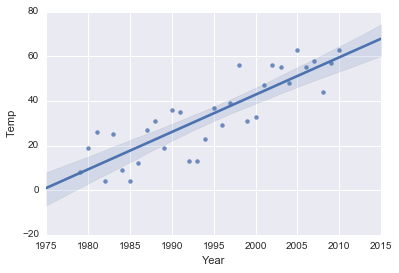

In [211]:
gwrm = pandas.read_csv('globalWarm2.txt', sep='\t')
gwrm['LogTemp']=np.log(gwrm['Temp'])
Y=gwrm['Temp']
X=gwrm['Year']
X =sm.add_constant(X)
logY=gwrm['LogTemp']
scat1=sns.regplot(x="Year",y="Temp",data=gwrm,scatter=True)
plt.xlabel("Year")
plt.ylabel("Temp")
model = sm.OLS.from_formula(formula='Temp ~ Year' ,data=gwrm)
results=model.fit()

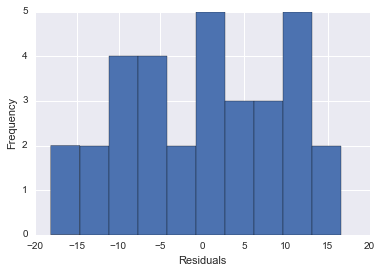

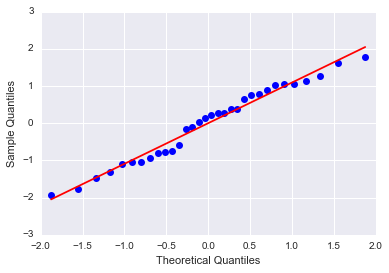

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     82.31
Date:                Thu, 29 Sep 2016   Prob (F-statistic):           4.20e-10
Time:                        20:42:11   Log-Likelihood:                -116.84
No. Observations:                  32   AIC:                             237.7
Df Residuals:                      30   BIC:                             240.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -3302.1490    367.673     -8.981      0.0

In [212]:
residuals = gwrm.Temp - results.predict(X)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.hist(results.resid)
plt.show()
fig = sm.qqplot(results.resid, fit=True, line='r')
plt.show()
print(results.summary())
print(results.params)
print("RSS : ", np.sum(results.resid**2))
print("MSE : ", np.mean(results.resid**2))  #Mean squared error

Answer 3a: Yes the temperature is increasing.

<b>Problem 3b</b> Plot a scatter plot of the following variables (preferably in a lattice):  Temp, CO<sub>2</sub>, Solar, Transmission, and IceShelf.  The variables represent the following:
<ul>
<li/>Temp = annual surface temperature measured in 1/100<sup>o</sup> C   over the 1950-1980 mean.  
<li/>Solar = annual mean intensity of sunlight piercing the atmosphere
<li/>CO2 = annual average fraction CO<sub>2</sub> in atmosphere (#molecules/#molecules of dry air) 
<li/>IceShelf = sea ice in 1MM square miles  hypothesized to reflect heat
<li/>Transmission = volcanic MLO transmission data where eruptions release greenhouse gases but also decrease the temperature
</ul>

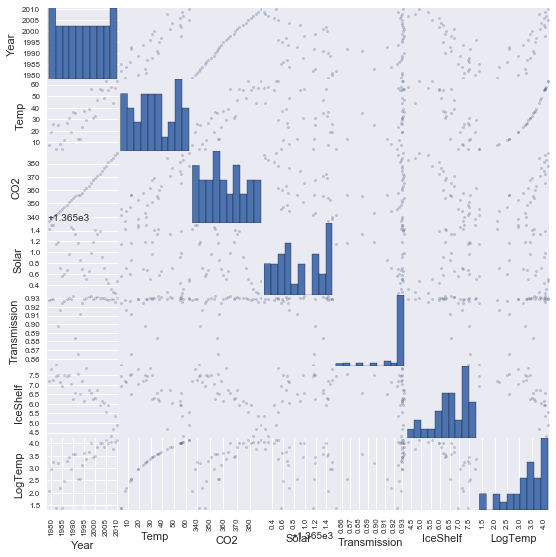

In [213]:
scatter_matrix(gwrm, alpha=0.3, figsize=(9, 9), diagonal='hist');

<b>Problem 3c</b> Compute a multiple linear regression model of log(Temp) against the other variables.  Note that since there are limited number of annual measurements, you cannot run all combinations of variables.  In fact, you can only do complete pairwise interactions.  Be sure to remove the non-significant variables while still maintaining the hierarchy principle in your final model.   Interpret the results.

In [214]:
model = sm.OLS.from_formula(formula='np.log(Temp)~(Year+Solar+CO2+Temp+Transmission)' ,data=gwrm)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(Temp)   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     49.01
Date:                Thu, 29 Sep 2016   Prob (F-statistic):           2.05e-12
Time:                        20:42:15   Log-Likelihood:                 1.3210
No. Observations:                  32   AIC:                             9.358
Df Residuals:                      26   BIC:                             18.15
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     -424.2370    217.456     -1.951   

In [215]:
model = sm.OLS.from_formula(formula='np.log(Temp)~(Temp+Transmission)*(Temp+Transmission)' ,data=gwrm)
results=model.fit()
print(results.summary())
#print(results.params)


                            OLS Regression Results                            
Dep. Variable:           np.log(Temp)   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     96.81
Date:                Thu, 29 Sep 2016   Prob (F-statistic):           6.86e-15
Time:                        20:42:15   Log-Likelihood:                 2.7119
No. Observations:                  32   AIC:                             2.576
Df Residuals:                      28   BIC:                             8.439
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -9.2785      3.30

<b> Problem 3d</b>	Run the diagnostics and interpret whether the model in c) works.

Answer 3c,3d: I ran the model with all the terms and no interactions. Only temp was significant and then next one in line was Transmission. This is shown in the first result upstairs. Then I tried all the 2x2 interactions and none were significant EXCEPT temp and Transmission. This result is show above. Adj R^2 is 90%. The two variables and their interactions are significant.

<b>Problem 4. [15 points]  Gradient Descent </b>

The function that we are trying to minimize using a gradient descent is:

f(x,y) = 100x&#10033;exp(-0.5x&#10033;x+0.5&#10033;x-0.5y&#10033;y-y+pi)

The gradient of f = grad f(x) = [dx dy] where

dx = 100exp(-0.5x&#10033;x+0.5x-0.5y&#10033;y-y+pi)*(1 + x(-x + 0.5))

dy = 100x&#10033;exp(-0.5x&#10033;x+0.5x-0.5y&#10033;y-y+pi)(-y - 1)





<b>Problem 4a</b>  Starting at point (x=0, y=5), perform a gradient descent to find the minimum value.  You will have to choose an appropriate step value.  Print out the iteration, sequence of locations, and step size. 
Comment on the descent path as to whether it is efficient or how it could be improved.

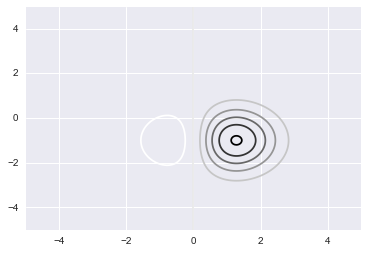

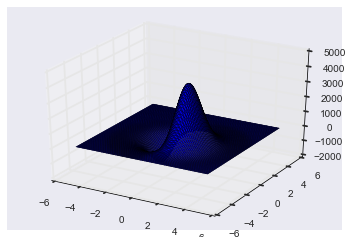

starting of iteration,x,y,z 5 5 1.31901005376e-08
End of iteration,x,y,z 4.94770637541 5.00007981075 1.64846215427e-08


In [216]:
# Contour plots
x = np.arange(-5, 5, 0.02);
y = np.arange(-5, 5, 0.02);
X, Y = np.meshgrid(x,y)
Z = 100*X*np.exp(-0.5*X**2 +0.5*X -0.5*Y**2-Y+math.pi)
gx = lambda a,b: 100*np.exp(-0.5*0**2 +0.5*0 -0.5*5**2-b+math.pi)*(1+0*(-1*5+0.5))
gy = lambda a,b: 100*a*np.exp(-0.5*a**2 +0.5*a -0.5*b**2-b+math.pi)*(-1*b-1)
f =  lambda a,b: 100*a*np.exp(-0.5*a**2 +0.5*a -0.5*b**2-b+math.pi)
plt.contour(X,Y,Z)
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z, rstride=4, cstride=5)
plt.show()
wxold=5
wyold=+5
gamma = .1 #step size
print("starting of iteration,x,y,z",wxold,wyold,f(wxold,wyold))
for i in range(9000):
    wx = wxold - gamma * gx(wxold,wyold)
    wy = wyold - gamma * gy(wxold,wyold)
    wxold=wx
    wyold=wy
print("End of iteration,x,y,z",wx,wy,f(wx,wy))


In 50 steps step of 0.01, the minimum value reached is no movement from the starting point the value is -3.036e-07. 

<b>Problem 4b</b> What happens if you use a moderately large step size?

In [217]:
With a step size of .1 I see that value is still at 3.11e-06, that is at hasn't reached lowest point

SyntaxError: invalid syntax (<ipython-input-217-5053d6999cac>, line 1)

<b>Problem 4c</b> Repeat 4a) using a starting location of (5, 5).  

I get the x y coordiantes don't move too much but the value of the function starts increasing
starting of iteration,x,y,z 5 5 1.31901005376e-08
End of iteration,x,y,z 4.94770637541 5.00007981075 1.64846215427e-08

We can start by looking at the contour plots and see why 5,5 is not a good starint point. It is pretty flat and the gradient will be close to 0.

<b>Problem 5 [15 points] Bayes Rule Application</b>

Alzheimer’s Disease is a terrible affliction affecting 5.3 million of the 319 million people in this country and is the only top-10 cause of death in this country that cannot be prevented, cured, or slowed (www.alz.org/facts). Researchers have developed a new method for predicting Alzheimer’s, but like most medical tests, it is not perfect

If a patient has Alzheimer’s there is a 70% chance of a positive
prediction. If they don’t have Alzheimer’s the chance of a positive prediction is 25%. Compute the probability of actually having Alzheimer’s if the prediction is positive. Show your work using a few lines of python that print the relevant components and final result.


Probability can be found this way. The sample space will be divided into two mutually exclusive events: A (has Alzheimers) and notA (no disease). The event + means positive prediction. Using Total Probability Theorem we can say that P(+)=P(+/A)P(A)+(P+/notA)P(notA). Using definition of Conditional Probability, we can state:

P(A/+)=P(A+)/P(+)

P(+)=P(+/A)P(A)+(P+/notA)P(notA)

P(A+)=P(+/A)P(A)

So we have the following data:
P(A)=5.3/319

P(notA)=1-5.3/319

P(+/A)=0.7

P(+/notA)=0.25

In [ ]:
P=(0.7)*(5.3/319)/((0.7)*(5.3/319)+0.25*(1-5.3/319))
P

So about 4.5% ist the probability 

<b>Problem 6 [10 points].  Information Gain</b>

Compute a decision tree to distinguish class A from class B for the following data set using information gain as the criteria and ignoring pruning.   Write a script to compute the information gain at the different split nodes and make appropriate decisions based on the data.  The solution can be specific to this problem rather than a general decision tree for any data.

<table>
<tr><th>FeatureX</th><th>FeatureY</th><th>FeatureZ</th><th>Class</th></tr>
<tr><td>Smart</td><td>Good</td><td>Hot</td><td>A</td></tr>
<tr><td>Smart</td><td>Ugly</td><td>Cold</td><td>A</td></tr>
<tr><td>Smart</td><td>Bad</td><td>Cold</td><td>B</td></tr>
<tr><td>Dumb</td><td>Bad</td><td>Hot</td><td>B</td></tr>
<tr><td>Smart</td><td>Good</td><td>Hot</td><td>A</td></tr>
<tr><td>Smart</td><td>Ugly</td><td>Hot</td><td>A</td></tr>
<tr><td>Dumb</td><td>Good</td><td>Hot</td><td>B</td></tr>
</table>


In [ ]:
test_df=pandas.DataFrame(columns=['FeatureX','FeatureY','FeatureZ','Class'])
test_df.loc[1]=['Smart','Good','Hot','A']
test_df.loc[2]=['Smart','Ugly','Cold','A']
test_df.loc[3]=['Smart','Bad','Cold','B']
test_df.loc[4]=['Dumb','Bad','Hot','B']
test_df.loc[5]=['Smart','Good','Hot','A']
test_df.loc[6]=['Smart','Ugly','Hot','A']
test_df.loc[7]=['Dumb','Good','Hot','B']


print("Feature X:\n",test_df.FeatureX.value_counts())
print("Feature X:\n",test_df.FeatureX.value_counts())
print("Feature Y:\n",test_df.FeatureY.value_counts())
print("Feature Z:\n",test_df.FeatureZ.value_counts())
print("Class:\n",test_df.Class.value_counts())
#Find Entropy of the target (Class)
#Entropy Class = Entropy(4,3)=4/3*log(4/3)+log
#EC=-4/7*np.log2(4/7)-3/7*np.log2(3/7)
#find Entropy on FeatureX..FeatureZ

test_df.describe()
test_df['Class']=test_df['Class'].map({'A':0,'B':1})
test_df['FeatureX']=test_df['FeatureX'].map({'Smart':1,'Dumb':0})
test_df['FeatureY']=test_df['FeatureY'].map({'Good':2,'Bad':1,'Ugly':0})
test_df['FeatureZ']=test_df['FeatureZ'].map({'Hot':1,'Cold':0})
test_df

In [ ]:
EC=-4/7*np.log2(4/7)-3/7*np.log2(3/7)
EC

In [ ]:
#Info ntropy on Class and FeatureZ
E32=-3/5*np.log2(3/5)-2/5*np.log2(2/5)
E11=-1/2*np.log2(1/2)-1/2*np.log2(1/2)
EZ=5/7*E32+2/7*E11
GZ=EC-EZ
print("Z Gain",GZ)
E21=-2/3*np.log2(2/3)-1/3*np.log2(1/3)
E20=0
E02=0
EY=3/7*E21
GY=EC-EY
print("Y Gain",GY)
E41=-4/5*np.log2(4/5)-1/5*np.log2(1/5)
E02=0
EX=5/7*E41
GX=EC-EX
print("X Gain",GX)

Therefore the highest gain is for feature Y at the first branch. Therefore split on Feature Y. Since for this feature Entropy is 0 for Ugly and Bad, they become leaf nodes. We need further splittig on the Good Node.
THe subtable for GOOD now is:

X    Y   Class
Sm   Hot  A
Sm   Hot  A
Dmb  Hot  B


In [ ]:
EC=-2/3*np.log2(2/3)-1/3*np.log2(1/3)
EC
#Info Entropy on Class and FeatureZ
E21=-2/3*np.log2(2/3)-1/3*np.log2(1/3)
EZ=E21
GZ=EC-EZ
print("Z Gain",GZ)
E20=0
E01=0
EX=0
GX=EC-EX
print("X Gain",GX)

Therefore the second split is going to be on Feature X

In [ ]:
#Cross validation
#Split into training and validation set
y=test_df['Class']
X_train, X_test, y_train, y_test = train_test_split(test_df, y, test_size=.15, random_state=10) 
print (test_df.shape, X_train.shape, X_test.shape)

In [ ]:
X_train.head()


<b>Optional Exploratory Point Opportunity</b>

Write a decision tree using a standard splitting criteria of your choice and a pruning algorithm.  You can implement just the first half without any pruning for a partial point opportunity.  

This does not mean that you can find code on the web and modify it.  It means thinking through the steps and writing your own code.  Apply it to an interesting data set and show the results.
